In [ ]:
import Constant
import utils
import re
import os.path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import AutoMinorLocator,LogLocator,MultipleLocator,FuncFormatter
#-------- 画图信息设置 ---------
plt.ion()
plt.rcParams["font.sans-serif"]=['simhei','Times New Roman']
# 英文字体
plt.rcParams["font.family"]=['Times New Roman']
plt.rcParams["font.size"]=16
plt.rcParams["axes.unicode_minus"]=False
#-------- 地址信息设置 ---------
addrSetFilePath = Constant.addressPath
outTxSetFilePath = Constant.addressOuterTxPath
tctxFilePath = Constant.tornadoTxPath
values = Constant.values

: 

In [ ]:
value = 'ETH'
vdir = []
for value in values:
    v_type = ''.join(re.findall(r'[A-Za-z]', value))
    if v_type == type:
        vdir.append(value)
vlen = len(vdir)
dfList = [pd.DataFrame()]*vlen
for addr_dir in os.listdir(addrSetFilePath):
    a = addr_dir.split('_')[0]
    if a in vdir:
        i = vdir.index(a)
        df = utils.readCsvFile(addrSetFilePath+addr_dir,0)
        newdf = [dfList[i], df]
        dfList[i] = pd.concat(newdf)

for idx, df in enumerate(dfList):
    print(vdir[idx],len(df))
    df = pd.DataFrame(df, columns=["Cnt","Inter_avg"])
    df = df.loc[(df['Cnt'] != 0) & (df['Cnt'] != 1) & df['Inter_avg']!=0]
    df['activity'] = df['Cnt']/df['Inter_avg'].abs()
    # df = pd.DataFrame(df, columns=["Cnt","NorGasPri_avg"])
    # df = df.loc[(df['Cnt'] != 0) & (df['Cnt'] != 1)]
    df = df.sort_values(by="activity",ascending=False)
    df = df.drop_duplicates()
    print(len(df))
    groups,bin_edges = pd.qcut(df.activity,200,retbins = True)
    pd.set_option('expand_frame_repr', False)
    print(bin_edges)

In [ ]:
value = 'ETH'
vdir = []
for value in values:
    v_type = ''.join(re.findall(r'[A-Za-z]', value))
    if v_type == type:
        vdir.append(value)
vlen = len(vdir)
dfList = [pd.DataFrame()]*vlen
for addr_dir in os.listdir(addrSetFilePath):
    a = addr_dir.split('_')[0]
    if a == value:
        df = utils.readCsvFile(addrSetFilePath+addr_dir,0)

# df = pd.DataFrame(df, columns=["Cnt","Inter_avg"])
# df = df.loc[(df['Cnt'] != 0) & (df['Cnt'] != 1) & df['Inter_avg']!=0]
# df['activity'] = df['Cnt']/df['Inter_avg'].abs()
df = pd.DataFrame(df, columns=["Cnt","Value_avg"])
df = df.loc[(df['Cnt'] != 0) & (df['Cnt'] != 1)]
df = df.sort_values(by="Value_avg",ascending=False)
df = df.drop_duplicates()
print(len(df))
groups,bin_edges = pd.qcut(df.Value_avg,400,retbins = True)
pd.set_option('expand_frame_repr', False)
bins = bin_edges.tolist()
file = 'Dataset/'+value+'_ValBin.txt'
f = open(file,'w')
f.write(str(bins))
f.close()

: 

In [20]:
type = 'ETH'
vdir = []
for value in values:
    v_type = ''.join(re.findall(r'[A-Za-z]', value))
    if v_type == type:
        vdir.append(value)
vlen = len(vdir)
df = pd.DataFrame()
for addr_dir in os.listdir(addrSetFilePath):
    a = addr_dir.split('_')[0]
    if a in vdir:
        i = vdir.index(a)
        adf = utils.readCsvFile(addrSetFilePath+addr_dir,0)
        newdf = [df, adf]
        df = pd.concat(newdf)
        print(addr_dir,len(adf), len(df))

print('ETH',len(df))


0.1ETH_Address_Statics.csv 18537 18537
100ETH_Address_Statics.csv 16936 35473
10ETH_Address_Statics.csv 6167 41640
1ETH_Address_Statics.csv 39882 81522
ETH 81522


In [21]:
# df = pd.DataFrame(df, columns=["Cnt","Inter_avg"])
# df = df.loc[(df['Cnt'] != 0) & (df['Cnt'] != 1) & df['Inter_avg']!=0]
# df['activity'] = df['Cnt']/df['Inter_avg'].abs()
df = pd.DataFrame(df, columns=["Cnt","Value_avg"])
df = df.loc[(df['Cnt'] != 0) & (df['Cnt'] != 1)]
df = df.sort_values(by="Value_avg",ascending=False)
df = df.drop_duplicates()
print(len(df))
groups,bin_edges = pd.qcut(df.Value_avg,400,retbins = True)
pd.set_option('expand_frame_repr', False)
bins = bin_edges.tolist()
file = 'Dataset/ETH_ValBin.txt'
f = open(file,'w')
f.write(str(bins))
f.close()

57633


In [19]:
df = pd.DataFrame(df, columns=["Cnt","Inter_avg"])
df = df.loc[(df['Cnt'] != 0) & (df['Cnt'] != 1) & df['Inter_avg']!=0]
df['activity'] = df['Cnt']/df['Inter_avg'].abs()
df = df.sort_values(by="activity",ascending=False)
df = df.drop_duplicates()
print(len(df))
groups,bin_edges = pd.qcut(df.activity,400,retbins = True)
pd.set_option('expand_frame_repr', False)
bins = bin_edges.tolist()
file = 'Dataset/ETH_ActBin.txt'
f = open(file,'w')
f.write(str(bins))
f.close()

58374


In [15]:

df = pd.DataFrame(df, columns=["Cnt","NorGasPri_avg"])
df = df.loc[(df['Cnt'] != 0) & (df['Cnt'] != 1)]
df = df.sort_values(by="NorGasPri_avg",ascending=False)
df = df.drop_duplicates()
print(len(df))
groups,bin_edges = pd.qcut(df.NorGasPri_avg,400,retbins = True)
pd.set_option('expand_frame_repr', False)
bins = bin_edges.tolist()
file = 'Dataset/ETH_GasBin.txt'
f = open(file,'w')
f.write(str(bins))
f.close()

60240


0


IndexError: cannot do a non-empty take from an empty axes.

57633


In [96]:
v_type = 'ETH'
addrDF = pd.DataFrame()
for addr_dir in os.listdir(addrSetFilePath):
    value = addr_dir.split('_')[0]
    # if value == v_type:
    type = ''.join(re.findall(r'[A-Za-z]', value))
    if  type == v_type:
        addrDir = addr_dir
        df = utils.readCsvFile(addrSetFilePath+addr_dir,0)
        newdf = [addrDF, df]
        addrDF = pd.concat(newdf)

                                                 Cnt     Inter_avg  \
0xa9e4332448318da58cdd398286c0809684ed9bd4  282757.0  6.104580e-01   
0xa9e4332448318da58cdd398286c0809684ed9bd4  282757.0  6.104580e-01   
0x467da46112005ac4c30826014ab8a565b4e5038c   71500.0  1.247041e+00   
0xb134c95cfc957e30e8d6e9f823277b3253c6205a    2644.0  2.058267e-01   
0x8eafee3d0df538a1e04487a43239c1c73b50032d   31650.0  3.035319e+00   
...                                              ...           ...   
0xffcc26e539b3e3a78bed32b74720f3efaa8fe803       2.0  5.917169e+07   
0xd3d58f876c9a9f6629287a5299be3865a9c27109       2.0  5.938368e+07   
0x34f5b08c44372ad473eeb8e8ce8bf331e01113c6       2.0  5.952808e+07   
0xf8b0bb99fa86d9423e7370cdcce44172fb154fc4       2.0  6.261200e+07   
0x3821ef02896bf5e9962ae8f5dedf307db5d0c31f       2.0  6.857435e+07   

                                                activity  
0xa9e4332448318da58cdd398286c0809684ed9bd4  4.631883e+05  
0xa9e4332448318da58cdd398286c0809684ed9bd

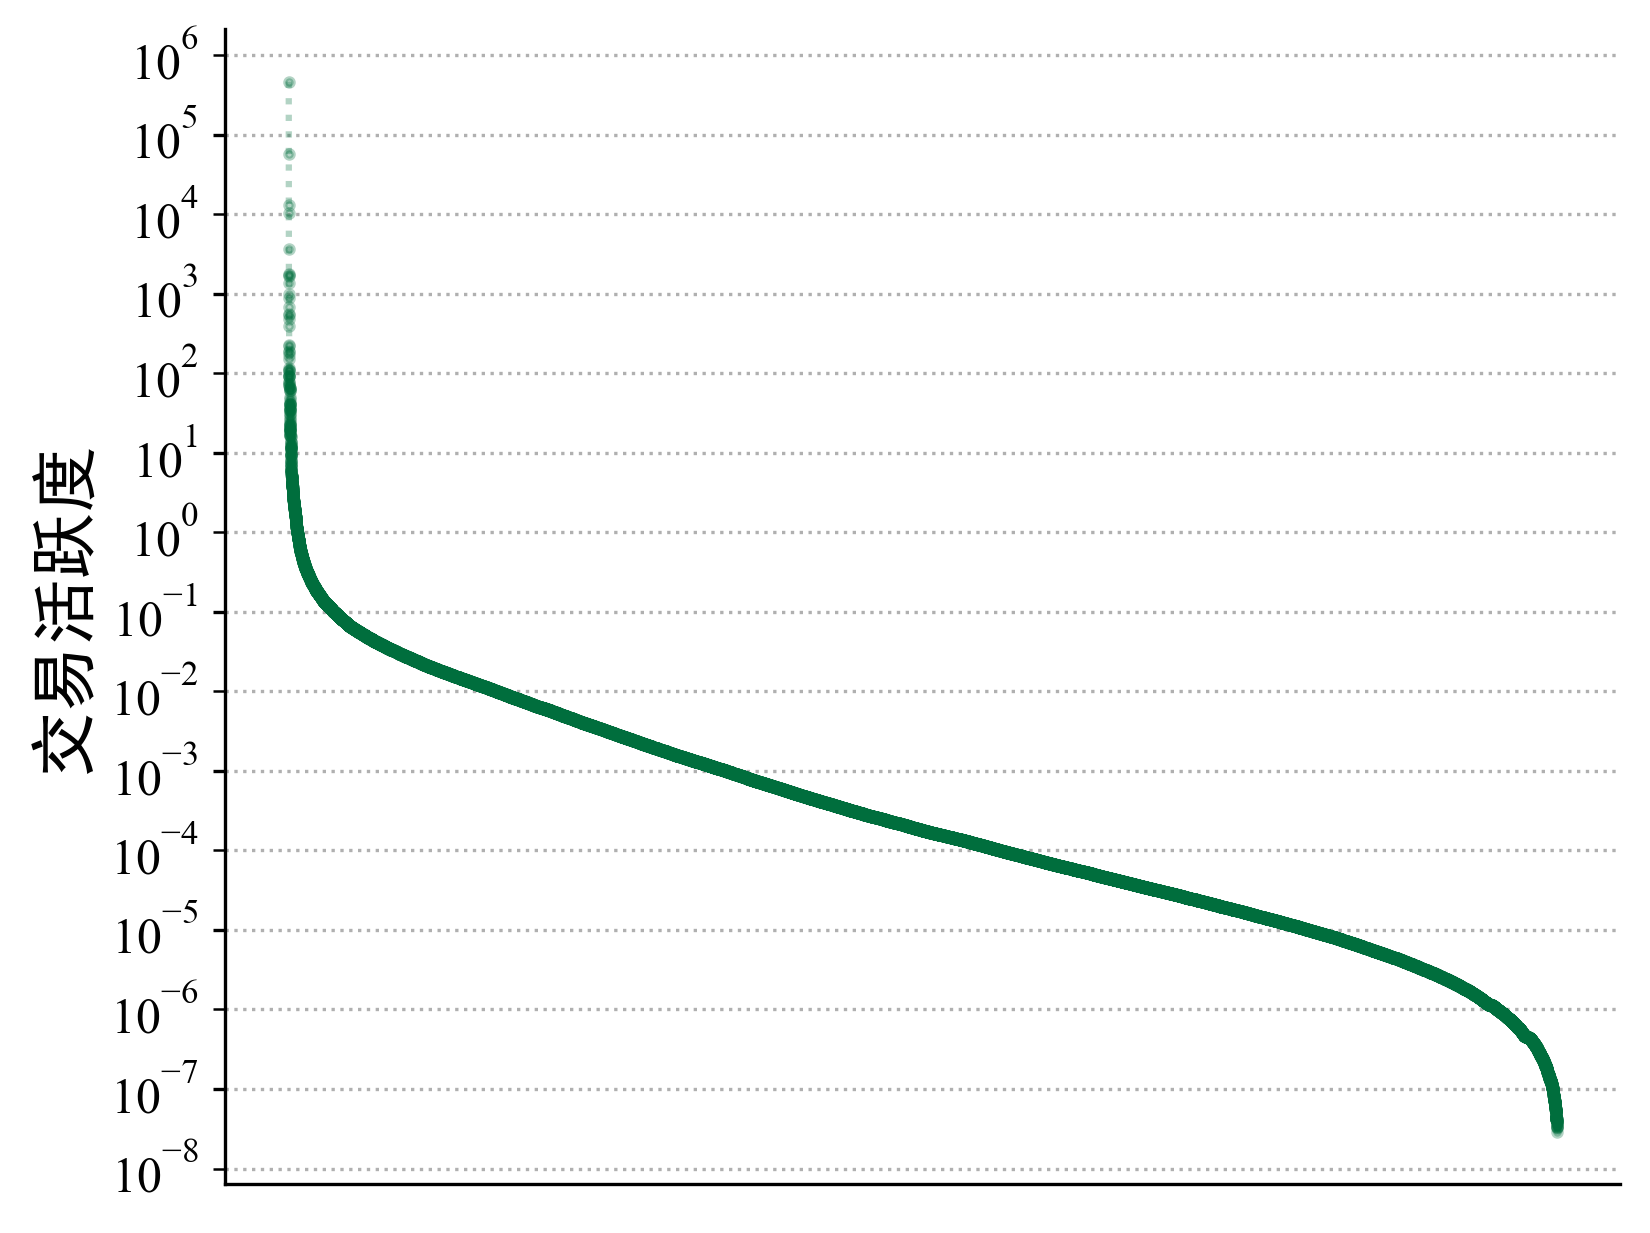

In [97]:
df = pd.DataFrame(addrDF, columns=["Cnt","Inter_avg"])
plt.figure(dpi=300, figsize=(6,5))

df = df.loc[(df['Cnt'] != 0) & (df['Cnt'] != 1) & df['Inter_avg']!=0]

df['activity'] = df['Cnt']/df['Inter_avg'].abs()
df = df.sort_values(by="activity",ascending=False)
print(df)
df = df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
print(df)
df.activity.plot(color='#006e3d', alpha=0.3, linestyle=':', marker = 'o', markersize='2',markeredgewidth=1)

plt.xlabel = []
ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
ax.set_xticks([])
ax.axes.xaxis.set_visible(False)
ax.set_ylabel('交易活跃度',fontfamily='sans-serif')

ax.set_yscale("log")
ax.yaxis.set_major_locator(plt.LogLocator(base=10.0, numdecs=10))
ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=[1.0], numticks=100))
ax.tick_params(which = "both", labelsize=12, length=3)
ax.grid(axis='y',linestyle=':',which='both')
plt.show()

                                            Zone
0x81bf01f58d29047448010d31f149e99cae141cf8  23.0
0x8f9763f8b259fe8c8947316eb1673314a16359e5  23.0
0x269545c379169fbaa5a2b086f4f91c2eafeb34a3  23.0
0x26ee0e8bcf8b319ca621456afda4815d29d0d0f2  23.0
0xf284091539db0ac9548e01d7d363c5703dc43648  23.0
...                                          ...
0x3d1bd00f95e9e38de6c15f76976fac0359985809   NaN
0x0628b57ac17be889603521bdff715e3649b184a8   NaN
0xb4fd007ab50d4c7b7f59ce295416d0d8d4065996   NaN
0xbb1eeee80b504911f974012ff0897599a990b3e4   NaN
0xbe78328a37e1aa51e05610c5f1b80f7e74e2e6fe   NaN

[81522 rows x 1 columns]
                                            Zone
index                                           
0x81bf01f58d29047448010d31f149e99cae141cf8  23.0
0x269545c379169fbaa5a2b086f4f91c2eafeb34a3  23.0
0x26ee0e8bcf8b319ca621456afda4815d29d0d0f2  23.0
0xf284091539db0ac9548e01d7d363c5703dc43648  23.0
0x8fad4ae7ca2498dcae6f243a088bf77c43992737  23.0
...                                        

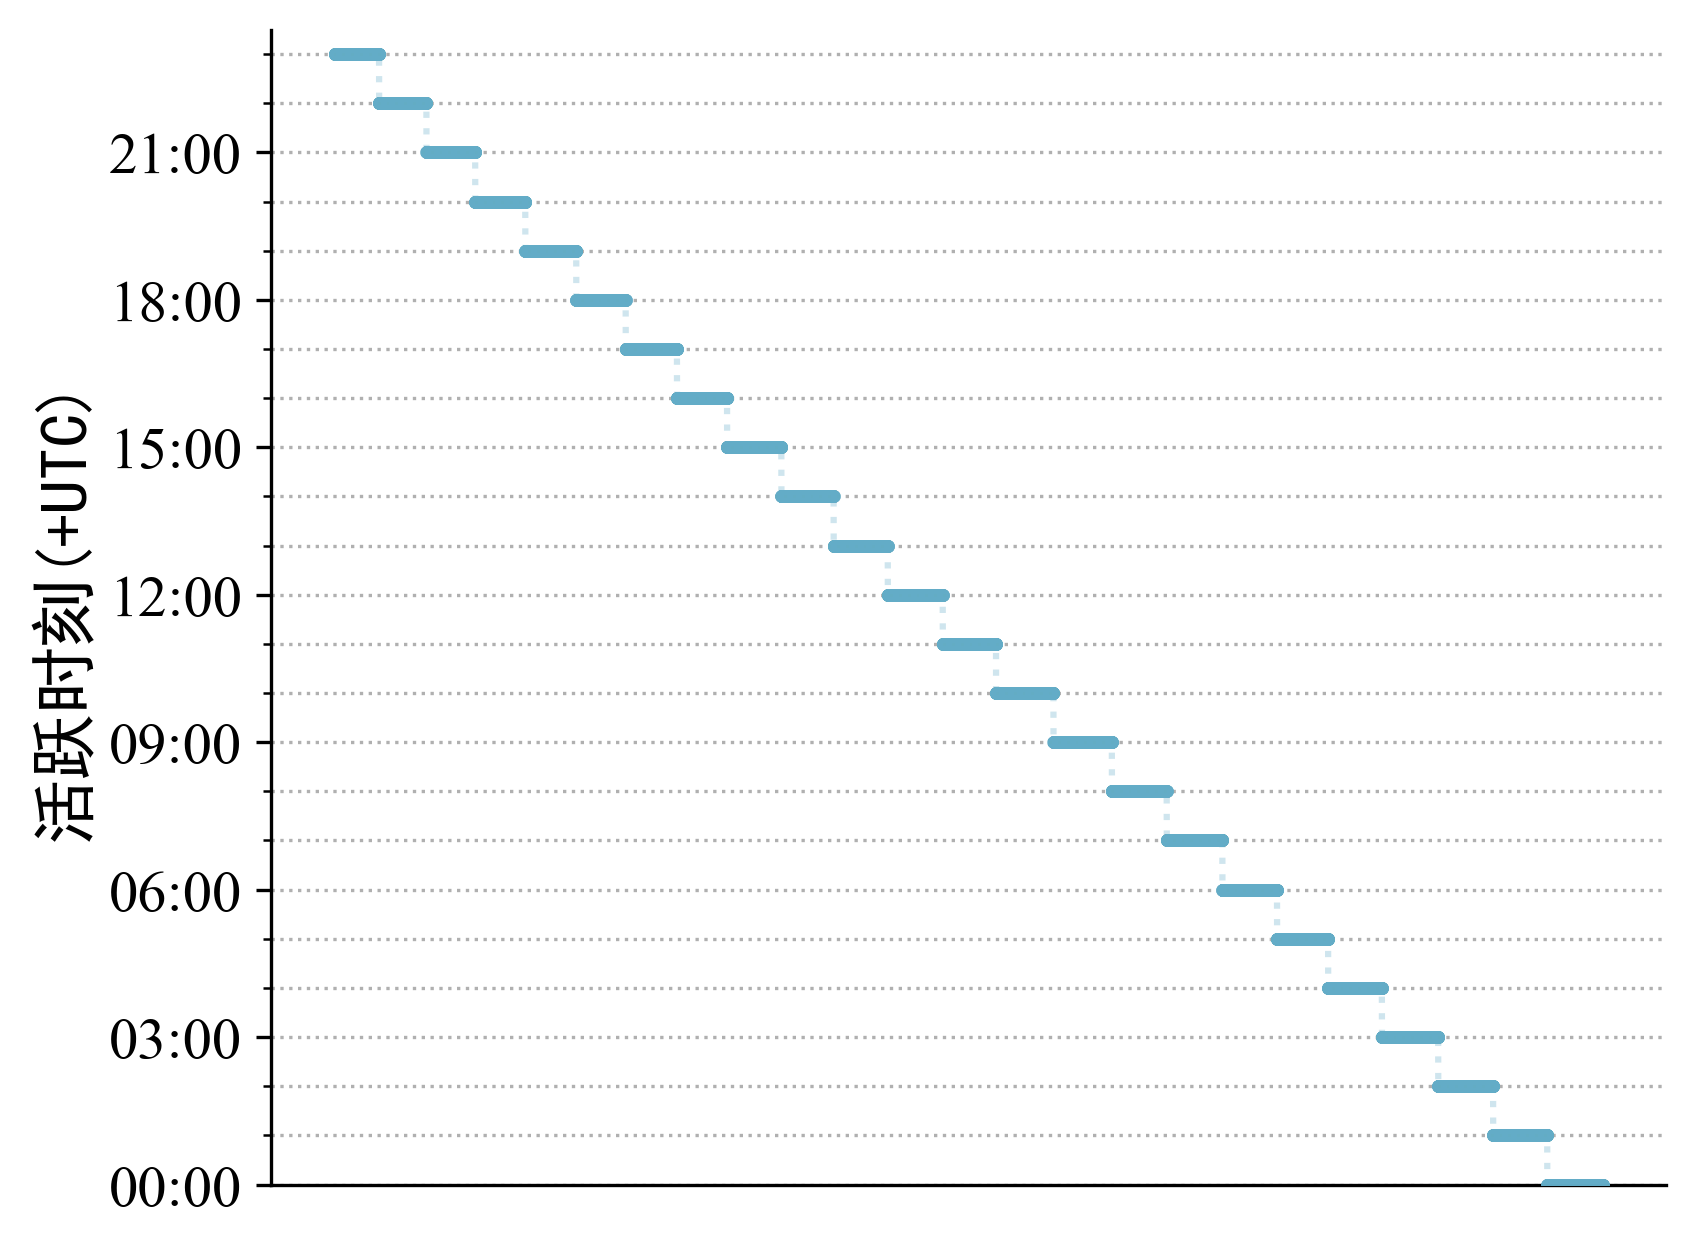

In [98]:
df = pd.DataFrame(addrDF, columns=["Zone"])
df = df.sort_values(by="Zone",ascending=False)
print(df)
df = df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
df = df.dropna()
print(df)

plt.figure(dpi=300, figsize=(6,5))
# print(df)
# df['Zone'] = df['Zone'].apply(lambda x: str(x).zfill(2)+':00')
df.Zone.plot(color='#63acc7', alpha=0.3, linestyle=':', marker = 'o', markersize='2',markeredgewidth=1, zorder=10)

plt.xlabel = []
ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
ax.set_xticks([])
ax.set_ylabel('活跃时刻(+UTC)',fontfamily='sans-serif')
ax.axes.xaxis.set_visible(False)
# ax.set_yticks(np.arange(0, 24, 2))
ax.set_ylim(0,23.5)
ax.yaxis.set_major_locator(MultipleLocator(3.0))
ax.yaxis.set_minor_locator(AutoMinorLocator(3))
#设置刻度格式器
def tick(x, pos):
    return str(int(x)).zfill(2)+':00'
ax.yaxis.set_major_formatter(FuncFormatter(tick))
ax.tick_params(which = "major", labelsize=14)
ax.grid(axis='y',linestyle=':',which='both')
plt.show()


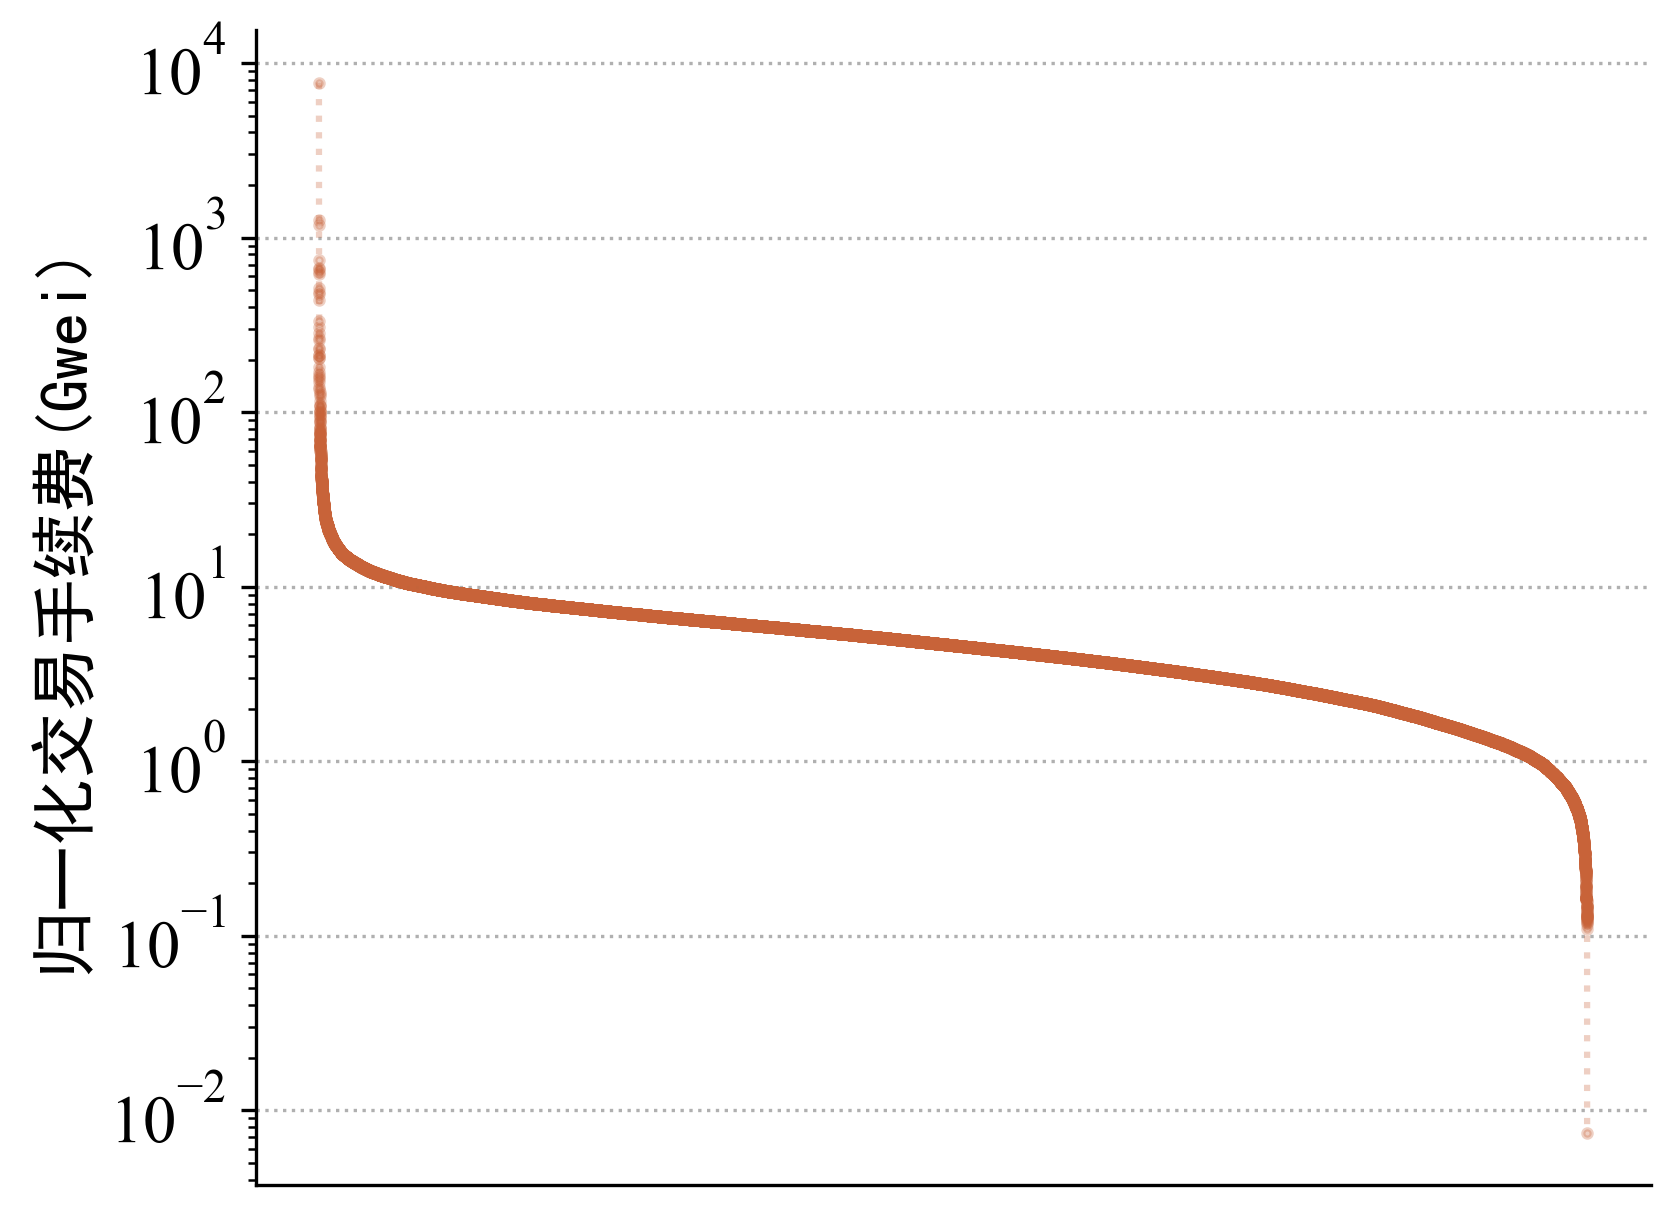

In [99]:
df = pd.DataFrame(addrDF, columns=["NorGasPri_avg"])
df = df.sort_values(by="NorGasPri_avg",ascending=False)
df = df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
df = df.dropna()
plt.figure(dpi=300, figsize=(6,5))
# print(df)
df.NorGasPri_avg.plot(color='#c86339', alpha=0.3, linestyle=':', marker = 'o', markersize='2',markeredgewidth=1)
plt.xlabel = []
ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
ax.set_yscale("log")
ax.axes.xaxis.set_visible(False)
ax.set_ylabel('归一化交易手续费(Gwei)',fontfamily='sans-serif')
ax.grid(axis='y',linestyle=':',which='major')

ax.set_xticks([])
plt.show()


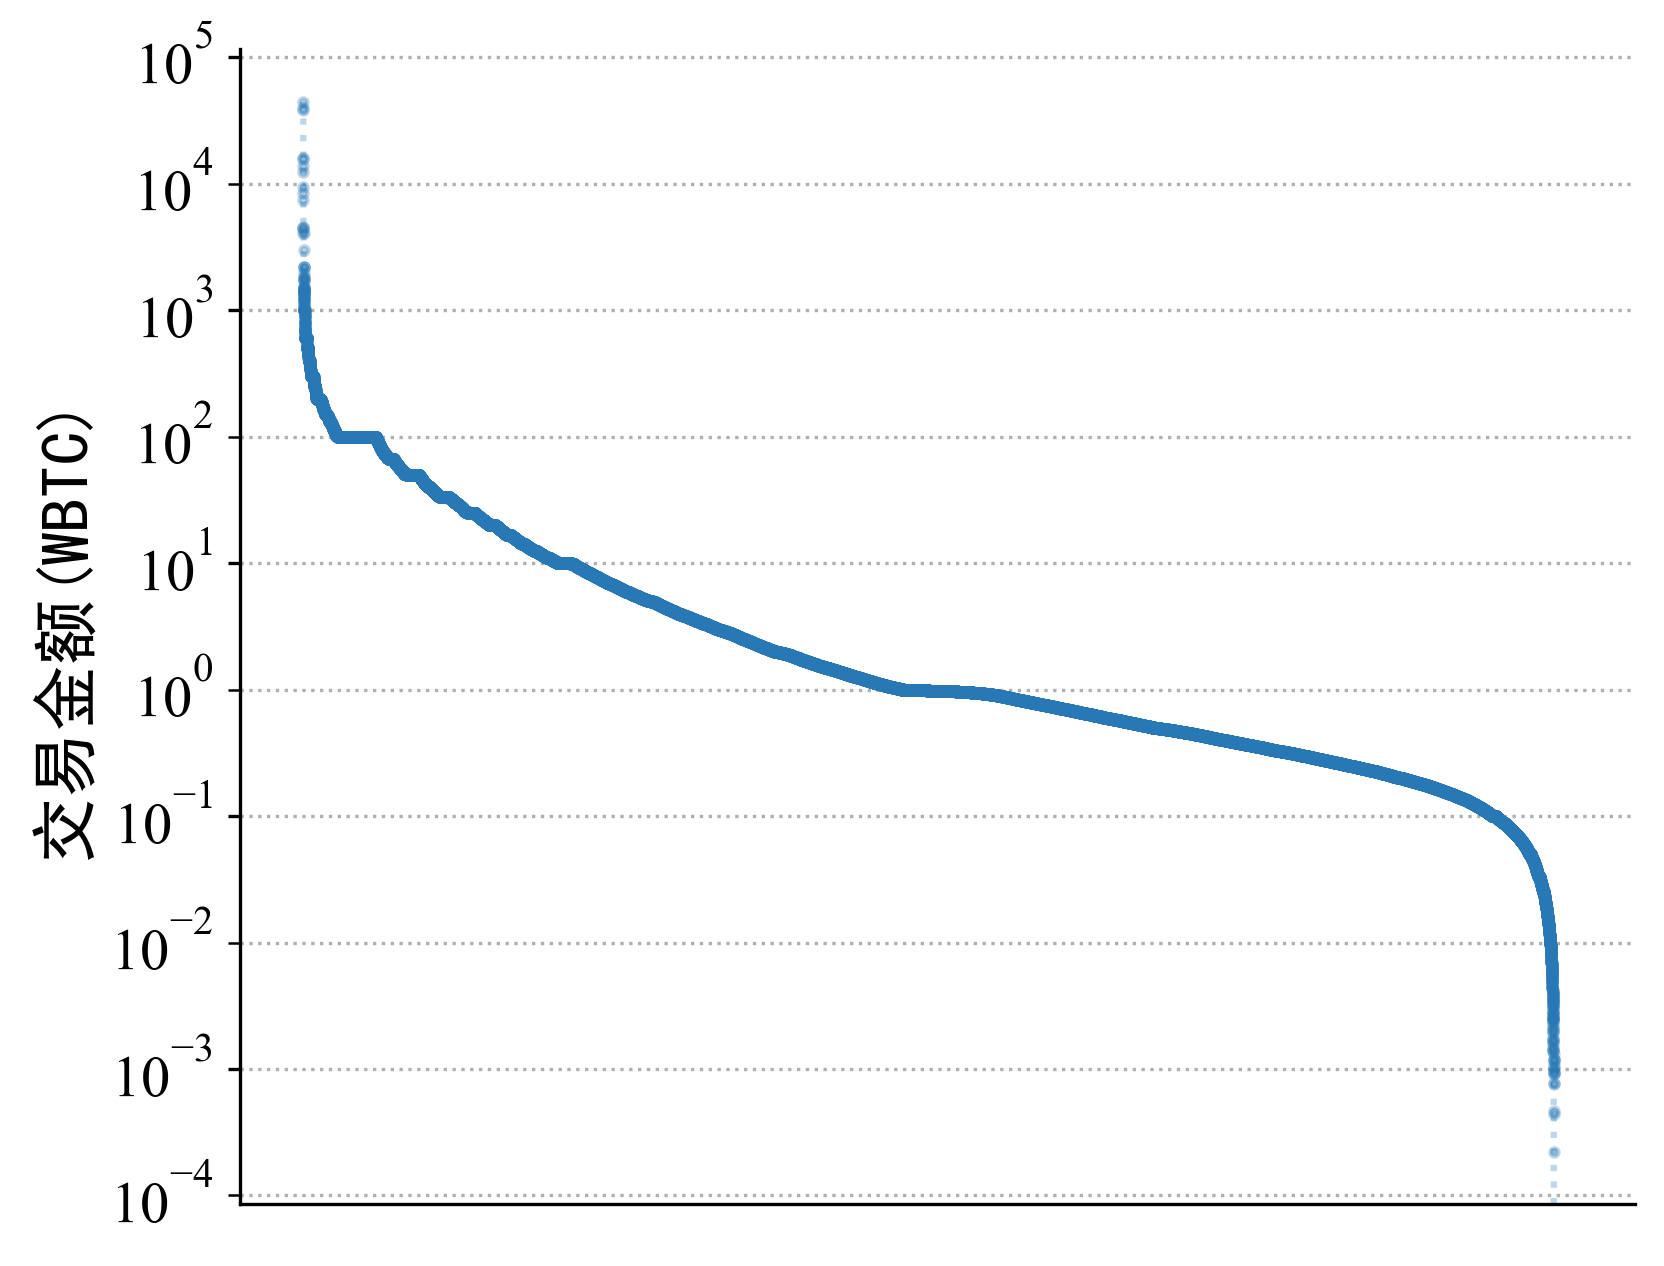

In [100]:
df = pd.DataFrame(addrDF, columns=["Value_avg"])
df = df.sort_values(by="Value_avg",ascending=False)
df = df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
df = df.dropna()
plt.figure(dpi=300, figsize=(6,5))
# print(df)
df.Value_avg.plot(color='#2878b5', alpha=0.3, linestyle=':', marker = 'o', markersize='2',markeredgewidth=1)
plt.xlabel = []
ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
ax.set_xticks([])
ax.axes.xaxis.set_visible(False)
ax.set_yscale("log")
ax.set_ylabel('交易金额(WBTC)',fontfamily='sans-serif')
ax.yaxis.set_major_locator(plt.LogLocator(base=10.0, numdecs=10))
ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=[1.0], numticks=100))
ax.tick_params(which = "both", labelsize=14, length=3)
# ax.yaxis.set_major_locator(MultipleLocator(3.0))
ax.grid(axis='y',linestyle=':',which='both')
plt.show()


In [101]:
type = ['0.1ETH','1ETH','10ETH','100ETH']
addrDF = pd.DataFrame()
addrdflist = [pd.DataFrame()] * 4
for value in values:
    for addr_dir in os.listdir(addrSetFilePath):
        a = addr_dir.split('_')[0]
        a_type = ''.join(re.findall(r'[A-Za-z]', a))
        # if value == v_type:
        # type = ''.join(re.findall(r'[A-Za-z]', value))
        for i in range(4):
            if  type[i] == a:
                df = utils.readCsvFile(addrSetFilePath+addr_dir,0)
                newdf = [addrdflist[i], df]
                addrdflist[i] = pd.concat(newdf)
# print(addrDF)

In [102]:
group = [0] * 4
index = [0] * 4
i = 0
act = [-1,10,30,80,200,400,600,1000,2000,3500,6000,10000,15000,25000,35000,50000,100000,150000,300000,1000000,50000000]
for df in addrdflist:
    df = pd.DataFrame(df, columns=["txCnt","Inter_avg","Zone","NorGasPri_avg","Value_avg"])
    df = df.loc[(df['txCnt'] != 0) & (df['txCnt'] != 1)]
    df['activity'] = df['Inter_avg'].abs()/df['txCnt']
    df = df.sort_values(by="activity",ascending=False)
    group[i] = pd.cut(df.activity,act)
    index[i] = group[i].index.values
    print(group[i].index.values)
    i = i+1


['0x3821ef02896bf5e9962ae8f5dedf307db5d0c31f'
 '0x3821ef02896bf5e9962ae8f5dedf307db5d0c31f'
 '0x3821ef02896bf5e9962ae8f5dedf307db5d0c31f' ...
 '0xa78ff8c9fbadfb7e8892dac2db970c97b908788d'
 '0xb84a1cbb3eb2ac1b25ff94506e2a4ca7dcb01cb8'
 '0x7a6942a0cf1803b56a9575cd7b132e2b7d0d8619']
['0x7f2914075e5293a6c6a9d97ea0ea8d1ed2a77484'
 '0x7f2914075e5293a6c6a9d97ea0ea8d1ed2a77484'
 '0x7f2914075e5293a6c6a9d97ea0ea8d1ed2a77484' ...
 '0x02cbbede84577866616119d1b78858a6a49d617e'
 '0xf9eccc7825f99b29a3c9617ed3627de9b2f7e349'
 '0x4387ea1569b948829e10290b7c94584d7156954f']
['0xf8b0bb99fa86d9423e7370cdcce44172fb154fc4'
 '0xf8b0bb99fa86d9423e7370cdcce44172fb154fc4'
 '0xf8b0bb99fa86d9423e7370cdcce44172fb154fc4' ...
 '0xb4fd007ab50d4c7b7f59ce295416d0d8d4065996'
 '0xbb1eeee80b504911f974012ff0897599a990b3e4'
 '0xbe78328a37e1aa51e05610c5f1b80f7e74e2e6fe']
['0x689e6eaac6cf0f9ab18847d359e3a1be97ce8c3d'
 '0x689e6eaac6cf0f9ab18847d359e3a1be97ce8c3d'
 '0x689e6eaac6cf0f9ab18847d359e3a1be97ce8c3d' ...
 '0xdf3f2c40e59